<a href="https://colab.research.google.com/github/IPL-UV/gaussflow/blob/master/docs/assets/demo/pytorch_nf_freia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch PlayGround

This is my notebook where I play around with all things PyTorch. I use the following packages:

* PyTorch
* Pyro
* GPyTorch
* PyTorch Lightning


In [1]:
# @title Install Packages
# %%capture
try:
    import sys, os
    from pyprojroot import here

    # spyder up to find the root
    root = here(project_files=[".here"])

    # append to path
    sys.path.append(str(root))
except ModuleNotFoundError:
    import os

    !pip install --upgrade pyro-ppl gpytorch pytorch-lightning tqdm wandb corner nflows
    !pip install git+https://github.com/VLL-HD/FrEIA.git

In [2]:
#@title Load Packages
# TYPE HINTS
from typing import Tuple, Optional, Dict, Callable, Union

# PyTorch Settings
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.distributions as dist

# PyTorch Lightning Settings
import pytorch_lightning as pl
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.loggers import WandbLogger

# NUMPY SETTINGS
import numpy as np
np.set_printoptions(precision=3, suppress=True)

# MATPLOTLIB Settings
import corner
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# SEABORN SETTINGS
import seaborn as sns
sns.set_context(context='talk',font_scale=0.7)
# sns.set(rc={'figure.figsize': (12, 9.)})
# sns.set_style("whitegrid")

# PANDAS SETTINGS
import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

# LOGGING SETTINGS
import sys
import logging
logging.basicConfig(
    level=logging.INFO, 
    stream=sys.stdout,
    format='%(asctime)s:%(levelname)s:%(message)s'
)
logger = logging.getLogger()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
logging.info("Using device: {}".format(device))
#logger.setLevel(logging.INFO)

%load_ext autoreload
%autoreload 2

2021-09-09 09:59:49,379:INFO:Using device: cuda


## Data

In [3]:
from pytorch_eo.datasets.eurosat import EuroSATRGB, EuroSAT, EuroSATRGB

In [4]:
ds = EuroSATRGB(batch_size=64, download=True, path="/datadrive/eman/datasets/eurosat", )

ds.setup()

data already extracted !
Number of images: 27000
training samples 16200
validation samples 5400
test samples 5400


In [5]:
train_ds = ds.train_dataloader()
val_ds = ds.val_dataloader()
test_ds = ds.test_dataloader()

In [6]:
len(train_ds), len(val_ds), len(test_ds)

(254, 85, 85)

In [7]:
len(train_ds)

254

In [8]:
for ix, iy in train_ds:
    
    break

In [9]:
X_init = ix
X_init.shape

torch.Size([64, 3, 64, 64])

In [10]:
X_init.min(), X_init.max()

(tensor(0.0196), tensor(1.))

In [13]:
from torchvision.utils import make_grid

def visualize_images(input_imgs):

    grid = make_grid((input_imgs*255).to(torch.int32), nrow=8, ncols=8)
    grid = grid.permute(1, 2, 0)
    plt.figure(figsize=(7,7))
    plt.title(f"Images")
    plt.imshow(grid)
    plt.axis('off')
    plt.show()

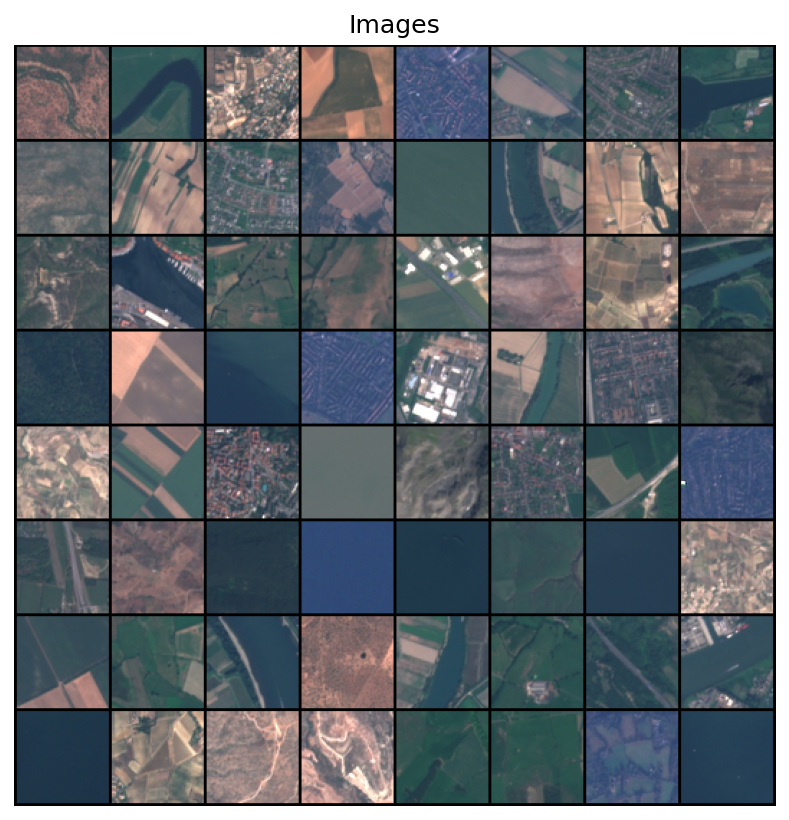

In [14]:
visualize_images(X_init[:64])